In [12]:
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [15]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [17]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [22]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [23]:
df.cluster.unique()

array([1, 2, 0], dtype=int32)

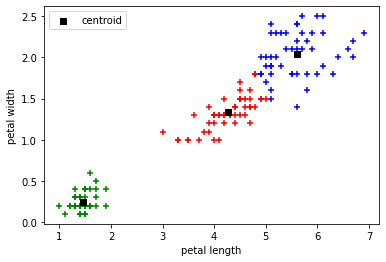

In [42]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue', marker= "+")
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green', marker= "+")
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='red', marker= "+")

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = "black", marker = ",", label = "centroid")

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

In [43]:
sse = []
k_range = range(1,10)
for i in k_range:
    km = KMeans(n_clusters = i)
    km.fit(df)
    sse.append(km.inertia_)

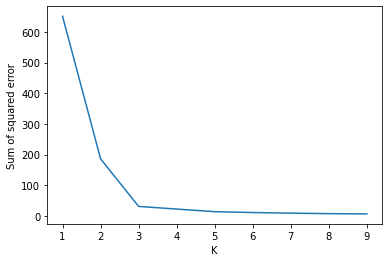

In [45]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)

## Elbow joint is formed at 3 so optimal value of K = 3.